In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime
from pyramid.arima import auto_arima

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/alext234/coronavirus-stats/master/data/who-global-cases.csv',index_col=0)

In [3]:
del data['report_url']

In [4]:
data = data[~data.index.duplicated(keep='last')]

In [5]:
data.describe()

,global_cases
count,54.000000
mean,79545.925926
std,56890.637691
min,2798.000000
25%,38307.000000
50%,78302.500000
75%,100993.250000
max,266073.000000


In [6]:
data.head()

,global_cases
date,
2020-01-27,2798
2020-01-28,4593
2020-01-29,6065
2020-01-30,7818
2020-01-31,9826


In [7]:
data.tail()

,global_cases
date,
2020-03-16,167511
2020-03-17,179112
2020-03-18,191127
2020-03-19,234073
2020-03-20,266073


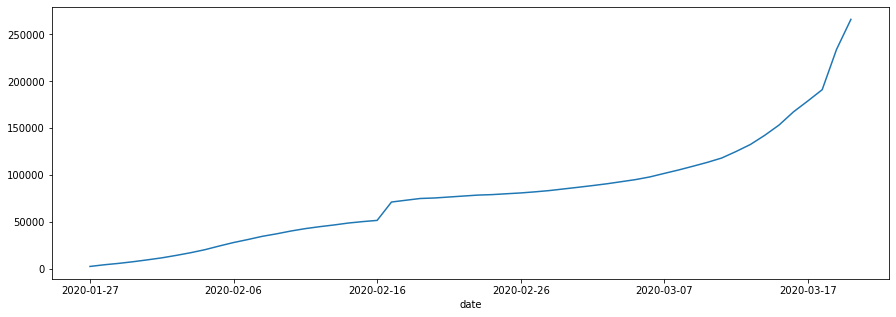

In [8]:
data.global_cases.plot(figsize=(15, 5))

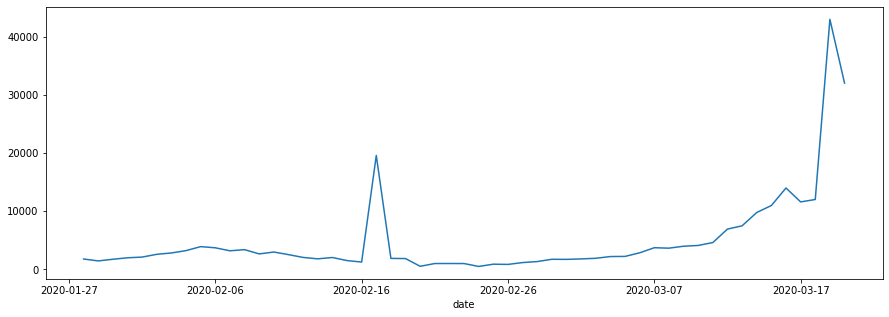

In [9]:
(data.global_cases - data.global_cases.shift(1)).plot(figsize=(15, 5))

In [10]:
predicted_days = 5
firstPredictionDay = datetime.datetime.strptime(data.index[-1], '%Y-%m-%d') + datetime.timedelta(days = 1)

In [11]:
stepwise_model = auto_arima(data.global_cases,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=1063.523, BIC=1075.230, Fit time=6.227 seconds
Fit ARIMA: order=(0, 2, 0); AIC=1052.531, BIC=1056.434, Fit time=0.020 seconds
Fit ARIMA: order=(1, 2, 0); AIC=1045.442, BIC=1051.296, Fit time=0.546 seconds
Fit ARIMA: order=(0, 2, 1); AIC=1044.039, BIC=1049.892, Fit time=0.559 seconds
Fit ARIMA: order=(1, 2, 1); AIC=1046.015, BIC=1053.820, Fit time=0.405 seconds
Fit ARIMA: order=(0, 2, 2); AIC=1045.997, BIC=1053.802, Fit time=0.632 seconds
Fit ARIMA: order=(1, 2, 2); AIC=1045.995, BIC=1055.751, Fit time=1.650 seconds
Total fit time: 10.099 seconds


In [12]:
stepwise_model.aic()

1044.0387007536858

In [13]:
stepwise_model.fit(data.global_cases)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 2, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [14]:
future_forecast = stepwise_model.predict(n_periods=predicted_days)

In [15]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(future_forecast[x])))

2020-03-21 - 297570
2020-03-22 - 329638
2020-03-23 - 362275
2020-03-24 - 395482
2020-03-25 - 429259
